In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindf = pd.read_csv("F:\Courses\Complete Guide to TensorFlow for Deep Learning with Python\Complete Guide to TensorFlow for Deep Learning with Python\Tensorflow-Bootcamp-master\My Other Notebooks\Fashion_MNIST Dataset/fashion-mnist_train.csv")
testdf = pd.read_csv("F:\Courses\Complete Guide to TensorFlow for Deep Learning with Python\Complete Guide to TensorFlow for Deep Learning with Python\Tensorflow-Bootcamp-master\My Other Notebooks\Fashion_MNIST Dataset/fashion-mnist_test.csv")
traindf.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(traindf.info())
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


In [4]:
traindf.shape

(60000, 785)

In [5]:
training = np.array(traindf,dtype='float64')
testing = np.array(testdf,dtype='float64')

In [6]:
training[0:1,0:782]

array([[  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   0.,   0.,   0.,   0.,   0.,  62.,  61.,  21.,  29.,
         23.,  51., 136.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.,
        201., 228., 225., 255., 115.,  62., 137., 255., 235., 222., 255.,
        135.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  47., 252., 

[[2.]]
2.0


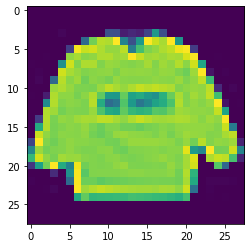

In [7]:
#Image at Index 0 
#plt.imshow(training[0:1,1:785].reshape(28,28))
plt.imshow(training[0:1,1:].reshape(28,28)) #Above and this is Both same

label = training[0,0]
print(training[0:1,0:1]) #Both way of getting same value
print(label)

2.0
7339


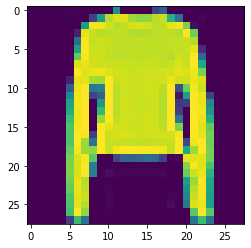

In [8]:
#Now lets see different images by generating random numbers
i=np.random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28)) #Above and this is Both same

label = training[i,0]
print(label)
print(i)

In [47]:
XData = training[:,1:].copy()
HoldOutXData = testing[:,1:].copy()

In [11]:
XData.shape

(60000, 784)

In [48]:
YData = training[:,0].copy()
HoldOutYData = testing[:,0].copy()

In [13]:
YData.shape

(60000,)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XData = scaler.fit_transform(XData) #Could have use MinMax Scaler, try to see if any difference
HoldOutXData = scaler.fit_transform(HoldOutXData)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(XData,YData, test_size=0.30, random_state=101)

8.0


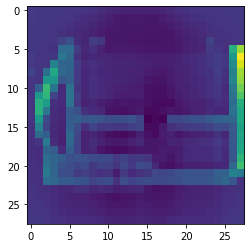

In [17]:
plt.imshow(X_train[1,:].reshape(28,28)) #Above and this is Both same
print(y_train[1])

# Just Checking Some Things for information

In [18]:
y_train.shape

(42000,)

In [19]:
X_train.shape

(42000, 784)

In [20]:
YData

array([2., 9., 6., ..., 8., 8., 7.])

In [21]:
X_train.shape

(42000, 784)

In [22]:
X_train[0]

array([-9.50487946e-03, -2.26930300e-02, -2.89069199e-02, -4.15570894e-02,
       -5.75746035e-02, -7.05032224e-02, -9.80836063e-02, -1.55981172e-01,
        5.55507905e+00,  4.44801516e+00,  1.92890677e+00,  1.05010680e+00,
        6.84166963e-01,  4.89146741e-01,  4.83019600e-01,  7.65883332e-01,
        9.07109344e-01,  1.84497087e+00,  2.68085956e+00,  1.03033349e+00,
       -2.02787726e-01, -1.38907066e-01, -1.09869470e-01, -9.26944615e-02,
       -6.81346810e-02, -4.93230305e-02, -3.25083245e-02, -1.48789598e-02,
       -1.16583707e-02, -1.74000966e-02, -3.39770021e-02, -5.47531662e-02,
       -7.90749804e-02, -1.31720968e-01,  1.41964229e+00,  4.78649505e+00,
        1.02081503e+00,  2.30371505e+00,  1.64307797e+00,  1.29024472e+00,
        1.15809703e+00,  1.39945410e+00,  1.42657175e+00,  1.19834731e+00,
        1.24644987e+00,  1.66527234e+00,  1.99957444e+00,  2.57484982e+00,
        2.67388998e+00, -3.16636191e-01, -2.08012535e-01, -1.49669926e-01,
       -1.18254633e-01, -

In [51]:
#Now Works Starts
#For reshaping first argument was number of rows, we need and 
#second argument is dimension of the picture
X_train=X_train.reshape(X_train.shape[0],*(28,28,1))
HoldOutXData=HoldOutXData.reshape(HoldOutXData.shape[0],*(28,28,1))
print(X_train.shape)
print(X_train[1700].shape)

(42000, 28, 28, 1)
(28, 28, 1)


In [24]:
X_test= X_test.reshape(X_test.shape[0],*(28,28,1)) 
print(X_test.shape)
X_test[0].shape

(18000, 28, 28, 1)


(28, 28, 1)

# Now Lets make CNN Model

In [25]:
 import keras

Using TensorFlow backend.


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
#Callback is used to stop within epoch, get value of weights etc. 
from keras.callbacks import TensorBoard

In [27]:
Cnn_Model = Sequential()

In [28]:
Conv_layer = Conv2D(filters=32,kernel_size=(3,3),strides=1,activation="relu",input_shape=(28,28,1))
Cnn_Model.add(Conv_layer)

In [29]:
First_Pooling_Layer = MaxPooling2D(pool_size=(2,2),strides=None)
Cnn_Model.add(First_Pooling_Layer)

In [30]:
Cnn_Model.add(Flatten())  

In [31]:
#Now add Neural Network Hidden Layers After working with images

In [32]:
Hidden_Layer1 = Dense(units=32,activation='relu')
Cnn_Model.add(Hidden_Layer1)

In [33]:
Output_Layer = Dense(units=10,activation='softmax') #Units are 10 because 10 Classes to categorize
#Output_Layer = Dense(units=10,activation='sigmoid') Ask someone why with also this everything well, with acc around 91
Cnn_Model.add(Output_Layer)

In [34]:
myoptimizer = Adam(lr=0.001)
mylossFunction = 'sparse_categorical_crossentropy'
Cnn_Model.compile(optimizer=myoptimizer,loss=mylossFunction,metrics=['accuracy'])

In [35]:
myepochs = 5

In [36]:
#Cnn_Model.fit(x=X_train,y=y_train,batch_size=1000,epochs=myepochs,verbose=1,validation_data=(X_test,y_test))
#Cnn_Model.fit(x=X_train,y=y_train,batch_size=1000,epochs=myepochs,verbose=1,validation_split=0.2)
Cnn_Model.fit(x=X_train,y=y_train,batch_size=1000,epochs=myepochs,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





42000/42000 [==============================] - 8s 182us/step - loss: 0.7985 - acc: 0.7310
Epoch 2/5
42000/42000 [==============================] - 7s 174us/step - loss: 0.4299 - acc: 0.8484
Epoch 3/5
42000/42000 [==============================] - 7s 166us/step - loss: 0.3671 - acc: 0.8728
Epoch 4/5
42000/42000 [==============================] - 7s 166us/step - loss: 0.3299 - acc: 0.8847
Epoch 5/5
42000/42000 [==============================] - 8s 185us/step - loss: 0.3108 - acc: 0.8891


In [37]:
#Let see if model continue learning from where it left
#Answer to that is Yes, it starts from where it left
Cnn_Model.fit(x=X_train,y=y_train,batch_size=1000,epochs=myepochs,verbose=1)

Epoch 1/5
42000/42000 [==============================] - 7s 166us/step - loss: 0.2912 - acc: 0.8969
Epoch 2/5
42000/42000 [==============================] - 7s 166us/step - loss: 0.2799 - acc: 0.9014
Epoch 3/5
42000/42000 [==============================] - 7s 167us/step - loss: 0.2640 - acc: 0.9069
Epoch 4/5
42000/42000 [==============================] - 7s 177us/step - loss: 0.2527 - acc: 0.9098
Epoch 5/5
42000/42000 [==============================] - 8s 184us/step - loss: 0.2440 - acc: 0.9132


In [39]:
evaluation = Cnn_Model.evaluate(X_test,y_test)

18000/18000 [==============================] - 1s 76us/step


In [40]:
evaluation

[0.29633302429649566, 0.8969444444444444]

In [41]:
print('Test Accuracy = ', evaluation[1])

Test Accuracy =  0.8969444444444444


In [42]:
predict_class = Cnn_Model.predict_classes(X_test)

In [43]:
predict_class

array([7, 5, 3, ..., 4, 1, 8], dtype=int64)

In [44]:
predict_class.shape

(18000,)

[[1532    2   16   35    4    2  202    0    9    0]
 [   4 1718    3   33    3    0    6    0    3    0]
 [  38    0 1407   11  126    3  199    0    3    0]
 [  45    6    6 1644   29    0   78    0    5    0]
 [   4    4   87   72 1424    0  206    0    7    0]
 [   0    0    0    1    0 1822    2   24    3   10]
 [ 169    0   75   43   62    1 1387    0   13    0]
 [   0    0    0    0    0   43    0 1744    3   28]
 [   6    2    3    4    1    3   18    2 1725    0]
 [   0    0    0    0    1   16    0   67    4 1742]]


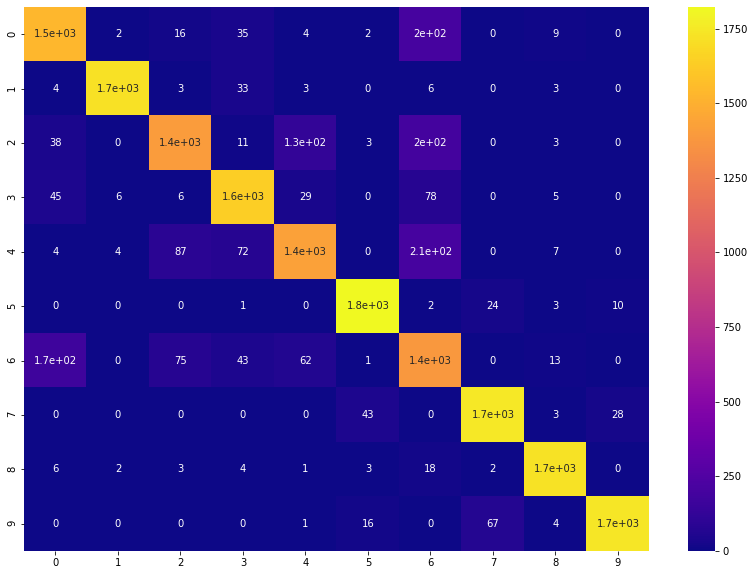

In [45]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,predict_class))
Matrix = confusion_matrix(y_test,predict_class)
plt.figure(figsize=(14,10))
sns.heatmap(Matrix,annot=True,cmap='plasma')#Annot tell column number 

In [46]:
from sklearn.metrics import classification_report
noOfClasses=10

MyClass_names = ["Class {}".format(i) for i in range(noOfClasses)]
print(classification_report(y_test,predict_class,target_names=MyClass_names)) 

              precision    recall  f1-score   support

     Class 0       0.85      0.85      0.85      1802
     Class 1       0.99      0.97      0.98      1770
     Class 2       0.88      0.79      0.83      1787
     Class 3       0.89      0.91      0.90      1813
     Class 4       0.86      0.79      0.82      1804
     Class 5       0.96      0.98      0.97      1862
     Class 6       0.66      0.79      0.72      1750
     Class 7       0.95      0.96      0.95      1818
     Class 8       0.97      0.98      0.97      1764
     Class 9       0.98      0.95      0.97      1830

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



In [164]:
#So we see it was most difficult for Class 6 to predict with accuracy, as low accuracy for Class 6

In [54]:
#Now if you want to use it on HoldOutDataset
evaluation = Cnn_Model.evaluate(HoldOutXData,HoldOutYData)
print('Test Accuracy = ', evaluation[1])

10000/10000 [==============================] - 1s 73us/step
Test Accuracy =  0.8988
